### Digit Classification of MNIST dataset after dimensionality reduction from 784 to 2 using PCA

##### Validation Accuracy ~ 47%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import theano
from keras.models import Sequential,Model
from keras.layers import Dense,Activation, Dropout
from sklearn.decomposition import PCA
from keras.utils import np_utils

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN 5005)
Using Theano backend.


In [7]:
x = pd.read_csv('/home/chiransh/all_projects/ML/t-sne_vs_pca_vs_autoencoder/train.csv')
X = np.array(x)
x = X[:,1:]
y = X[:,0]
print x.shape,y.shape

y_train = y[:30000]
y_crossval = y[30000:]
print x.shape,y_train.shape,y_crossval.shape

(42000, 784) (42000,)
(42000, 784) (30000,) (12000,)


In [8]:
x = (x - x.mean())/x.std()

In [9]:
pca = PCA(n_components=2)

X = pca.fit_transform(x)
#X_crossval = pca.fit_transform(x_crossval)
X_train = X[:30000,:]
X_crossval = X[30000:,:]
Y_train = np_utils.to_categorical(y_train)
Y_crossval = np_utils.to_categorical(y_crossval)
print X_train.shape, X_crossval.shape, Y_train.shape, Y_crossval.shape

(30000, 2) (12000, 2) (30000, 10) (12000, 10)


In [10]:
model = Sequential()

model.add(Dense(16, input_dim=2))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 16)            48          dense_input_2[0][0]              
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 16)            0           dense_3[0][0]                    
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 16)            0           activation_3[0][0]               
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 10)            170         dropout_2[0][0]                  
___________________________________________________________________________________________

In [11]:
hist = model.fit(X_train, Y_train,
                nb_epoch=100,
                shuffle=True,
                batch_size=256,
                validation_data=(X_crossval, Y_crossval))

Train on 30000 samples, validate on 12000 samples
Epoch 1/100
30000/30000 [==============================] - 4s - loss: 3.1513 - acc: 0.1734 - val_loss: 1.9786 - val_acc: 0.2578
Epoch 2/100
30000/30000 [==============================] - 4s - loss: 2.0605 - acc: 0.2757 - val_loss: 1.5876 - val_acc: 0.3913
Epoch 3/100
30000/30000 [==============================] - 3s - loss: 1.8000 - acc: 0.3290 - val_loss: 1.5116 - val_acc: 0.4046
Epoch 4/100
30000/30000 [==============================] - 3s - loss: 1.6969 - acc: 0.3455 - val_loss: 1.4755 - val_acc: 0.4223
Epoch 5/100
30000/30000 [==============================] - 5s - loss: 1.6433 - acc: 0.3559 - val_loss: 1.4551 - val_acc: 0.4248
Epoch 6/100
30000/30000 [==============================] - 5s - loss: 1.6002 - acc: 0.3695 - val_loss: 1.4371 - val_acc: 0.4301
Epoch 7/100
30000/30000 [==============================] - 5s - loss: 1.5787 - acc: 0.3747 - val_loss: 1.4231 - val_acc: 0.4312
Epoch 8/100
30000/30000 [=============================

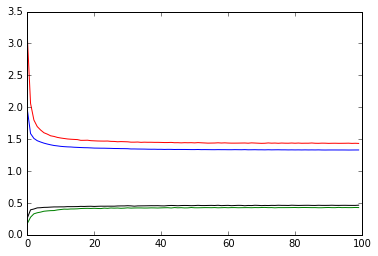

In [12]:
plt.plot(hist.history['val_loss'], color ='b')
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_acc'], color ='black')
plt.plot(hist.history['acc'], color ='g')
plt.show()